### #VIPatAINEAI
## Virtual Internship Program - VIP @ AINE AI.

<img src="AINE AI Image.JPG" width="150" />

### Project: Statistical Analysis and Hypothesis Testing using Python. 
<br>
<div style = "font-size: 15px">
<b>Submitted by: Umadevi Balasubramanian</b>
<br><b><I>
Data Science Intern - September 2021 Batch</b></I></div>

<b>Purpose: Increasing the revenue from game purchases by increasing the Retention Rate of gamers.</b><br>
<br>
<b>About the project: </b>The project involves working on data related to Cookie Cats – a hugely popular puzzle game. As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in the player's enjoyment of the game being increased and prolonged. But where should the gates be placed and how the placement of the gates can retain the players for more time.
The project requires you to:
- Perform exploratory data analysis of the given datasets and generate their statistical summary.
- Perform A/B testing between the two groups of data to analyze the impact on player retention if the first gate in Cookie Cats is moved from level 30 to level 40.
<br>

<img src = "CookieCatImage_Project7.JPG" align="middle"></img><br>
<br>
<b>Tool Used:</b> Jupyter Notebook
<br><br>
<b>Aim: </b>Even though the overall subscription for the game is growing, the revenue from in-game purchases has been declining 
and many players are uninstalling the game after playing for a few days. What recommendations can you suggest increasing the 
in-game purchase and retaining the players?

<b> Objectives: </b> The overall objective of the project is to test the company’s CEO’s hypothesis that moving the first 
gate from level 30 to level 40 increases retention rate and the number of game rounds played. The CEO believes that players 
are churning because the first gate encountered at level 30 is too early which forces players to wait before they can 
proceed further in the game.

In order to increase player retention rate, developers ran <b>AB-Test</b> by moving the first gate from level 30 to level 40 for some players i.e.,
- group A would encounter the gate at level 30, and
- group B would encounter the gate at level 40

<b>A/B Testing:</b>
- A/B test, also known as split test, allow us to compare 2 versions (Group A & Group B) of something to learn which is more effective.


## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [2]:
#Read data using pandas
user_df = pd.read_csv("cookie_cats.csv")

### Data Exploration

<b> Check the Data Types & Dimensions of the dataset. </b>

In [3]:
#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. No. of rows and columns")
user_df.shape

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. No. of rows and columns


(90189, 5)

<b>Displaying first 5 Rows of data.</b>

In [4]:
#display first 5 rows of the data using "head" function

print("First 5 rows of the raw data:")
user_df.head(5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


<img src="Project7_DataInfo.JPG" align='left'></img>

## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [5]:
#Check for any missing values in the data using isnull() function

user_df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

<b> No missing values detected.</b>

In [6]:
# To check if there is any duplicate user_id
user_df.userid.nunique() / user_df.shape[0]            

1.0

<b>No duplicate data found.</b>

### Q1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

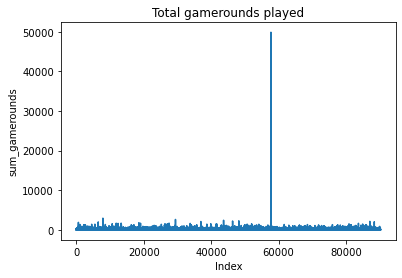

In [7]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

<b>The above plot shows that there is an outlier. Using max() function, we figure out the outlier value for  
sum_gamerounds as 49,854.</b>

<b>Figure out the outlier value.</b>

In [8]:
user_df.sum_gamerounds.max()

49854

<b> Finding the index value of outlier value to remove it.</b>

In [9]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier

index_value = user_df.sum_gamerounds.idxmax()

print("The Index value of Maximum sum_gamerounds is:", index_value)


The Index value of Maximum sum_gamerounds is: 57702


In [10]:
# Display Record having sum_gamerounds is 49854 which is at Index 57702.

display(user_df.loc[user_df.sum_gamerounds == 49854])

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


<b>After finding the index value (57702) of the outlier value, we drop the data row which contains the outlier.</b>

In [11]:
#Plot the graph for sum_gamerounds player after removing the outlier

user_df.drop(index = index_value, inplace=True)
display(user_df)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


<b> Plotting again the sum_gamerounds column after removing outlier.</b>

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

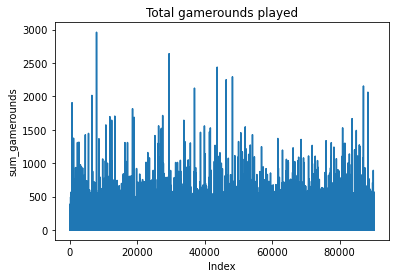

In [12]:
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

<h3><b><span style = 'color:MediumVioletRed'>Step 1: Initial Data Preparation is done.</span></b></h3>

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [13]:
#Insert calculation for 7-day retention rate

retention_day7 = (user_df["retention_7"].mean()) * 100
print(f"Overall 7-Days Retention Rate of the game for both versions is: %.2f " %retention_day7 + "%")


Overall 7-Days Retention Rate of the game for both versions is: 18.61 %


### Q2.2 How many players never played the game after installing? 

In [14]:
# Find number of customers with sum_gamerounds is equal to zero
# Method 1

never_played_game = user_df.sum_gamerounds[user_df.sum_gamerounds == 0].count()
print(never_played_game)

# Method 2
#never_played_game = len(user_df[user_df.sum_gamerounds == 0] .index)


3994


### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

Text(0.5, 0, 'Sum_Gamerounds')

Text(0, 0.5, 'Count of Users')

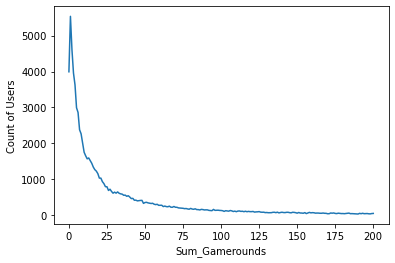

In [15]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart

num_users = user_df.groupby("sum_gamerounds").userid.count()
plt.plot(num_users[:201])
plt.xlabel("Sum_Gamerounds")
plt.ylabel("Count of Users")

<mark> __Observation:__
    
- <b>The observation from the above plot is, the number of users decreased as the game level increases, 
which means that the high level game-rounds are difficult.</b>

<h3><b><span style = 'color:MediumVioletRed'>Step 2: Statistical summary was generated and charts were plotted
to answer the given questions.</span></b></h3>

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [16]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda x: x/x.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__
    
> <b><span style = 'color:Green'>The difference between retention rate for gate 30 & gate 40 is minimum. But, gate_30 has bit higher
  7 day retention rate (0.1902) which helps to arrive at a conclusion that users play game for more than 7 days at gate level 30.</span></b>

### Q3.2 Gamerounds summary for different game versions

In [17]:
#use pandas group by to calculate average game rounds played summarized by different versions.

user_df.groupby("version").sum_gamerounds.agg(["count", "mean"])


,count,mean
version,,
gate_30,44699,51.342111
gate_40,45489,51.298776


<mark>__Analsysis Results:__
    
> <b><span style = 'color : Green'>The total number of sum_gamerounds by each player differs slightly based on game version. The sum_gamerounds for gate_40 is 
  more than for gate_30, but the average gamerounds played is bit higher for gate_30 than for gate_40.</span></b>

<h3><b><span style = 'color : MediumVioletRed' size = "4">Step 3: Crosstabs were generated to understand the difference in the 1-day and 
7-days retention rate and total number of game rounds played.</span></b></h3>

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

<b><span style = 'color:Orange'>A/B Testing </span></b>

<b>Two-Sample Test:</b>
- The two-sample t-test (also known as the independent samples t-test) is a method used to test whether the unknown 
population means of two groups are equal.
- A two-sample t-test is used to analyze the results from A/B tests.
-It can be used to test when the data values are independent, are randomly sampled from two normal populations and the 
two independent groups have equal variances.

### Initial data processing

In [18]:
#Define A/B groups for hypothesis testing

user_df["version"] = user_df['version'].replace(["gate_30", "gate_40"], ["A", "B"])
group_A = pd.DataFrame(user_df[user_df.version == "A"]["sum_gamerounds"])
group_B = pd.DataFrame(user_df[user_df.version == "B"]["sum_gamerounds"])

In [19]:
user_df.head(5)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,False,False
1,337,A,38,True,False
2,377,B,165,True,False
3,483,B,1,False,False
4,488,B,179,True,True


### Q4.1 Shapiro test of Normality

<b>Shapiro Wilks Normality Test:</b>
- The Shapiro-Wilks test for normality is one of three general normality tests designed to detect all departures from normality.
- It is comparable in power to the other two tests. The test rejects the hypothesis of normality when the p-value is less than or
equal to 0.05.

In [20]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
normality_A = shapiro(group_A) 

#test for group_B
normality_B = shapiro(group_B)

In [21]:
print(normality_A)
print(normality_B)

ShapiroResult(statistic=0.48864424228668213, pvalue=0.0)
ShapiroResult(statistic=0.4825654625892639, pvalue=0.0)


<mark>__Analsysis Results:__
    
> <b><span style = 'color : Green'>The significance value (p-value) of Shapiro Wilk's test of Normality for both group_A and group_B are 
less than 0.05, which implies that the Null Hypothesis H0: Distribution is Normal -  is False. So,we reject H0. Hence,
The data in sum_gamerounds column at gate_30 and gate_40 are not normally distributed.</span></b>

### Q4.2 Test of homegeneity of variance

<b>Homogeneity of Variance:</b>
- Equal variances across samples is called homogeneity of variance. Some statistical tests, for example the analysis of 
variance, assume that variances are equal across groups or samples. The <b>Levene Test</b> can be used to verify that assumption.
-  If the resulting p-value of Levene's test is less than some significance level (typically 0.05), the obtained differences in
sample variances are unlikely to have occurred based on random sampling from a population with equal variances. 

In [22]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results

stats.levene(group_A.sum_gamerounds, group_B.sum_gamerounds)

LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

<mark>__Analsysis Results:__
> <b><span style = 'color : Green'> The p-value from the Levene's test is 0.784, which is much greater than 0.05. Therefore, H0 is accepted. 
<br>Hence, both Group A and Group B have same kind of vaiances. </span></b>

### Q4.3 Test of significance: Two sample test

<b>Test of Significance:</b>
- A test of significance is a formal procedure for comparing observed data with a claim (also called a hypothesis), the 
truth of which is being assessed. The claim is a statement about a parameter, like the population proportion p or the 
population mean µ.
- The<b> Mann Whitney U test</b>, sometimes called the Mann Whitney Wilcoxon Test or the Wilcoxon Rank Sum Test, is used to test 
whether two samples are likely to derive from the same population (i.e., that the two populations have the same shape).
- When computing U, the number of comparisons equals the product of the number of values in group A times the number of 
values in group B. If the null hypothesis is true, then the value of U should be about half that value. If the value of 
U is much smaller than that, the P value will be small.

In [23]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different (That means group_A has more number of sum_gamerounds).

#Apply relevant two sample test to accept or reject the NULL hypothesis


stats.mannwhitneyu(group_A.sum_gamerounds, group_B.sum_gamerounds, alternative='greater')

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.02544577639572688)

<mark>__Analsysis Results:__
    
> <b><font color = 'Green'>We have repeated the Mann-Whiteney U Test with the same H0, but with the alternate hypothesis
being whether group_A is greater than group_B. The resultant p-value of the test is 0.025 which is less than 0.05. Hence we reject the 
null hypothesis H0.
<br>So, the two samples group_A and group_B are not same, they are statistically different.</font></b>

<h3><b><span style = 'color : MediumVioletRed'>Step 4: Two-sample test to test the statistical significance amongst groups A and B
for sum_gamerounds played is performed, which confirmed that, both groups (A & B ) are statistically different.</span></b></h3> 

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [24]:
user_df[["version", "retention_7", "retention_1"]].groupby("version").agg("mean")

,retention_7,retention_1
version,,
A,0.190183,0.448198
B,0.182000,0.442283


<mark>__Analsysis Results:__
    
> <b><span style = 'color : Green'>From the above result, it is clear that both the 1-day & 7-day retention rates are more at gate_30. Hence, The conclusion arrived is ,
</span>
> <span style = 'color:Blue'>The company should not change the gate from level 30 to level 40.</span></b>

<h3><b><span style = 'color:MediumVioletRed'>Step 5: The significance test results were analyzed and the conclusion derived is:
Gate_30 has more advantage in terms of player retention.</span></b></h3>

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

- The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement. It can be used to estimate summary statistics such as the mean or standard deviation.
- This process allows you to calculate standard errors, construct confidence intervals, and perform hypothesis testing for numerous types of sample statistics.

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'Retention Rate')

Text(0.5, 1.0, '1-Day Retention Rate Distribution')

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'Retention Rate')

Text(0.5, 1.0, '7-Days Retention Rate Distribution')

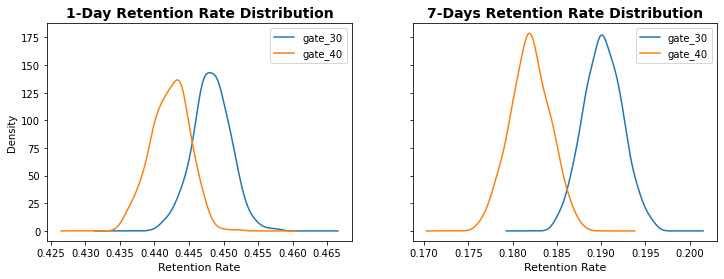

In [29]:
#Hint: Plot density function
list_1day = []
list_7day = []

for i in range(500):
    boot_mean1 = user_df.sample(frac = 0.7, replace = True).groupby('version')['retention_1'].mean()
    list_1day.append(boot_mean1.values)
    
    boot_mean2 = user_df.sample(frac = 0.7, replace  = True).groupby('version')['retention_7'].mean()
    list_7day.append(boot_mean2.values)
    
# Transforming the list to a DataFrame
list_1day = pd.DataFrame(list_1day, columns = ['gate_30','gate_40'])
list_7day = pd.DataFrame(list_7day, columns = ['gate_30','gate_40'])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 4))

list_1day.plot(kind = "kde", ax = ax1)
ax1.set_xlabel("Retention Rate", size=11)
ax1.set_title("1-Day Retention Rate Distribution", fontweight='bold', size=14)

list_7day.plot(kind="kde", ax = ax2)
ax2.set_xlabel("Retention Rate", size=11)
ax2.set_title("7-Days Retention Rate Distribution", fontweight='bold', size=14)

<Mark> __Observation__
- <b>The above plots also show the same result as that of the previous cross tab. That is, gate_30 is having higher Retention Rate for both 1-day & 7-days.</b>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, '% Difference')

Text(0, 0.5, '% Density')

Text(0.5, 1.0, 'Difference in Retention Rates at both gates 30 & 40.')

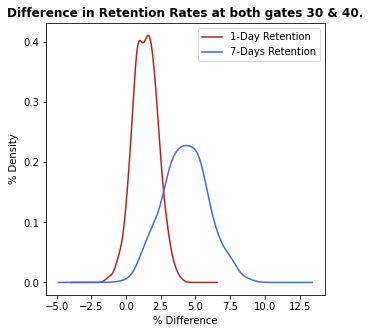

In [26]:
# Adding a column with the % difference between the two (A & B) groups for both gate_30 & gate_40. 
list_1day['diff'] = (list_1day['gate_30'] - list_1day['gate_40']) /  list_1day['gate_30'] * 100
list_7day['diff'] = (list_7day['gate_30'] - list_7day['gate_40']) /  list_7day['gate_30'] * 100

# Plotting the Bootstrap % Difference for gate_30
fig, (ax1) = plt.subplots(1, 1, figsize=(5,5))
list_1day['diff'].plot(kind = "kde", ax=ax1, c="#b22222", label="1-Day Retention")
list_7day['diff'].plot(kind = "kde", ax=ax1, c="#4169e1", label="7-Days Retention")
ax1.set_xlabel("% Difference")
ax1.set_ylabel("% Density")
ax1.set_title("Difference in Retention Rates at both gates 30 & 40.", fontweight='bold')
plt.legend()
plt.show()

<Mark> __Observation:__
- <b>The above chart shows that the most likely % difference is around 1% to 3% for 1-Day Retention, and is higher (around 2% to 8%) for 7-Days Retention.</b>
- <b>Mostly the distribution is above 0% at gate_30.</b>


### Finding the Probability of 1-day & 7-days Retention Rates - at Gate-30.

In [27]:
# Calculating Probabilities for 1-day & 7-days Retention Rate at gate_30.
prob1 = (list_1day['diff'] > 0).sum() / len(list_1day)
prob2 = (list_7day['diff'] > 0).sum() / len(list_7day)

# printing the probability

print("Probability of 1-day Retention Rate at gate_30:", '{:.1%}'.format(prob1))
print("Probability of 7-days Retention Rate at gate_30:", '{:.1%}'.format(prob2))


Probability of 1-day Retention Rate at gate_30: 95.2%
Probability of 7-days Retention Rate at gate_30: 99.8%


<Mark> __Observation__
- <b>The bootstrap result indicates that, there is a 99% chance for the 7-day retention is higher at gate_30 than gate_40.</b>

<h3><b><span style = 'color : MediumVioletRed'>Step 6: Bootstrap Resampling is used to plot the retention rate distribution for both groups to visualize the effect of different 
versions of the game on retention.</span></b></h3> 

### <mark>  __Conclusion:__
<h3><b><span style = 'color : Blue'>If we want to keep Retention high for both 1-Day & 7-Days - Do not move Gate from level 30 to 40.
</span></b></h3>